In [1161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [1162]:
from sklearn.datasets import load_digits
df = load_digits()
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [1163]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [1164]:
# for i in range(10):
#     plt.matshow(df.images[i])
df.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [1165]:
df.target[:5]

array([0, 1, 2, 3, 4])

In [1166]:
import hashlib

# Function to hash an image
def hash_image(image):
    # Flatten, convert to bytes, and hash
    flat_image = image.flatten().tobytes()
    return int(hashlib.sha256(flat_image).hexdigest(), 16)

# Apply hashing to all images
unique_hashes = np.array([hash_image(img) for img in df.images])

In [1167]:
len_x = len(df.images)
x = df.images.reshape((len_x,-1))
print(x.shape)
y = df.target

(1797, 64)


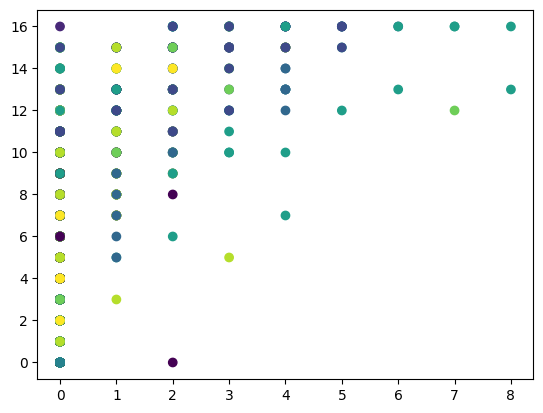

In [1168]:
plt.scatter(x[:,1],x[:,2],c=df.target)

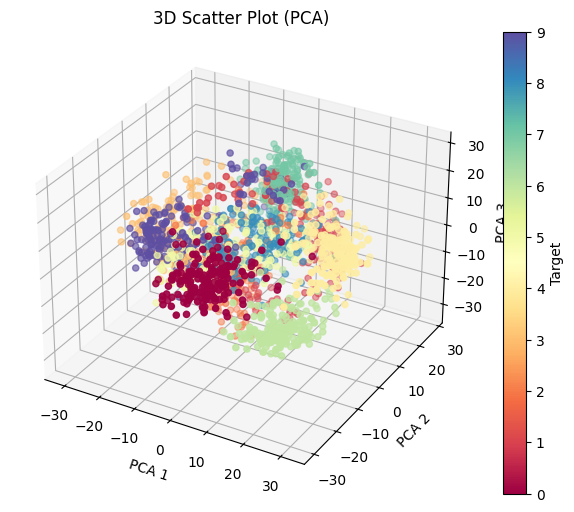

In [1169]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
# PCA to 3 components
pca_3d = PCA(n_components=3)
x_pca_3d = pca_3d.fit_transform(x)

# 3D Scatter Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_pca_3d[:, 0], x_pca_3d[:, 1], x_pca_3d[:, 2], c=df.target, cmap='Spectral')
fig.colorbar(scatter, label='Target')
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.title("3D Scatter Plot (PCA)")
plt.show()


In [1170]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [1171]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9833333333333333

In [1172]:
model_linearKernel = SVC(kernel='linear')
model_linearKernel.fit(x_train,y_train)
model_linearKernel.score(x_test,y_test)

0.9666666666666667

In [1173]:
model_c = SVC(C=10)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.9916666666666667

In [1174]:
model_c2 = SVC(C=15)
model_c2.fit(x_train,y_train)
model_c2.score(x_test,y_test)

0.9916666666666667

In [1175]:
model_g = SVC(gamma=0.0001)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.9611111111111111